**Spotify Pre-processing**

---



Importing required libraries and modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import missingno as msno


Reading data

In [ ]:
df=pd.read_csv('songs_normalize.csv')
df


,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


In [ ]:
df.describe() #statistical information about the data

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228748.124500,2009.49400,59.872500,0.667437,0.720366,5.378000,-5.512435,0.553500,0.103568,0.128955,0.015226,0.181216,0.551690,120.122558
std,39136.569008,5.85996,21.335577,0.140416,0.152745,3.615059,1.933482,0.497254,0.096159,0.173346,0.087771,0.140669,0.220864,26.967112
min,113000.000000,1998.00000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203580.000000,2004.00000,56.000000,0.581000,0.622000,2.000000,-6.490250,0.000000,0.039600,0.014000,0.000000,0.088100,0.386750,98.985750
50%,223279.500000,2010.00000,65.500000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059850,0.055700,0.000000,0.124000,0.557500,120.021500
75%,248133.000000,2015.00000,73.000000,0.764000,0.839000,8.000000,-4.167750,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.265500
max,484146.000000,2020.00000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


First 5 entries

In [ ]:
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


Last 5 entries

In [ ]:
df.tail()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop
1999,Post Malone,Circles,215280,False,2019,85,0.695,0.762,0,-3.497,1,0.0395,0.1920,0.002440,0.0863,0.553,120.042,hip hop


EDA

Sorting and displaying genre according to popularity

In [ ]:
df[['genre', 'popularity']].groupby(['genre'], as_index=False).mean().sort_values(by='popularity', ascending=False)

,genre,popularity
42,"pop, rock, Folk/Acoustic",79.000000
1,"Folk/Acoustic, pop",78.000000
57,"rock, pop, metal, Dance/Electronic",76.000000
27,"hip hop, rock, pop",75.000000
29,metal,72.000000
13,easy listening,72.000000
18,"hip hop, latin, Dance/Electronic",72.000000
47,"rock, Folk/Acoustic, pop",71.000000
53,"rock, metal",70.921053
5,"World/Traditional, Folk/Acoustic",69.000000


Problems observed:

Popularity: not scaled properly. Values vary largely 

Genre: mixed and repetitive 




**Types of data**

Categorical: 
artist,explicit,key,mode,genre,year,popularity


Numerical: 
duration,dance,energy,loudness,speechiness,instruments,liveness,valence,tempo

Displaying the years along with the song count

In [ ]:
df.groupby('year')['year'].count()

year
1998      1
1999     38
2000     74
2001    108
2002     90
2003     97
2004     96
2005    104
2006     95
2007     94
2008     97
2009     84
2010    107
2011     99
2012    115
2013     89
2014    104
2015     99
2016     99
2017    111
2018    107
2019     89
2020      3
Name: year, dtype: int64

Sorting and displaying according to song popularity

In [ ]:
sorted_df = df.sort_values('popularity', ascending = False).head(100)
sorted_df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
1322,The Neighbourhood,Sweater Weather,240400,False,2013,89,0.612,0.807,10,-2.810,1,0.0336,0.04950,0.017700,0.1010,0.398,124.053,"rock, pop"
1311,Tom Odell,Another Love,244360,True,2013,88,0.445,0.537,4,-8.532,0,0.0400,0.69500,0.000017,0.0944,0.131,122.769,pop
201,Eminem,Without Me,290320,True,2002,87,0.908,0.669,7,-2.827,1,0.0738,0.00286,0.000000,0.2370,0.662,112.238,hip hop
1613,WILLOW,Wait a Minute!,196520,False,2015,86,0.764,0.705,3,-5.279,0,0.0278,0.03710,0.000019,0.0943,0.672,101.003,"pop, R&B, Dance/Electronic"
6,Eminem,The Real Slim Shady,284200,True,2000,86,0.949,0.661,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.760,104.504,hip hop


Creating year ranges for a better understnading of song popularity variation

In [ ]:
df['yearBand'] = pd.cut(df['year'], 5)
df[['yearBand', 'popularity']].groupby(['yearBand'], as_index=False).mean().sort_values(by='yearBand', ascending=True)

,yearBand,popularity
0,"(1997.978, 2002.4]",60.710611
1,"(2002.4, 2006.8]",59.150510
2,"(2006.8, 2011.2]",60.875260
3,"(2011.2, 2015.6]",58.312039
4,"(2015.6, 2020.0]",60.300733


Visualization correlation

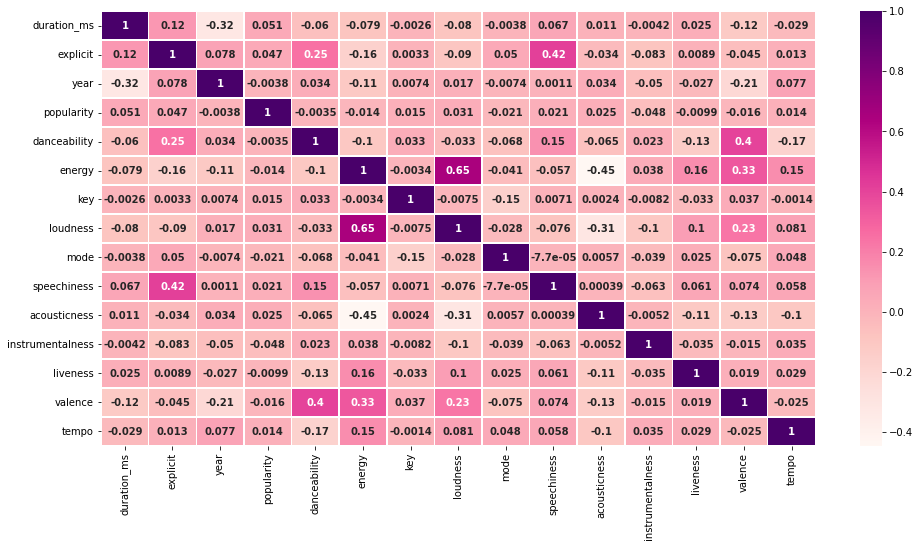

In [ ]:
import matplotlib.pyplot as plot
import seaborn as sns
import matplotlib.ticker as ticker
corr = df.corr()
fig1 = plot.figure(figsize=(16, 8))
sns.heatmap(df.corr(), annot=True, annot_kws={'weight':'bold'},linewidths=.5, cmap='RdPu')

In the heat map above, the greatest correlation is observed between loudness and energy (0.65) and duration has the highest correlation with popularity (0.051)